# S41 Algorithm Analysis

Analysis of the S41 team's solution to the ROADEF 2012 Machine Reassignment Problem.

This notebook analyzes the process reassignments and algorithm behavior.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import ast

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


In [4]:
# Load the tracking data
sol1_data = pd.read_csv('/home/pbiel/repos/mrp/gavra/results_a1_2_20250810_235705/process_reassignments_sol1.csv')
sol2_data = pd.read_csv('/home/pbiel/repos/mrp/gavra/results_a1_2_20250810_235705/process_reassignments_sol2.csv')

print(f"Solution 1: {len(sol1_data)} reassignments")
print(f"Solution 2: {len(sol2_data)} reassignments")
print("\nFirst few rows of Solution 1:")
sol1_data.head()


Solution 1: 2331 reassignments
Solution 2: 1945 reassignments

First few rows of Solution 1:


,MoveNum,ProcessID,SourceMachine,DestMachine,OriginalMachine,Service,MoveCost,ProcessResourceRequirements,Improvement,Timestamp,...,DestMachineResourceUsage,SourceMachineCapacities,DestMachineCapacities,SourceMachineTransientUsage,DestMachineTransientUsage,SourceMachineProcessCount,DestMachineProcessCount,LoadCost,BalanceCost,SolutionCost
0,1,1,23,60,60,11,1,"[425647,435001,123315,27354]",0.0,1754866646000,...,"[2426149,2500128,4894369,2960909]","[2614227,3192815,2727080,2379658]","[2513744,2131731,5158196,3885345]","[2117309,2620848,2185072,2290395]","[2426149,2500128,5087521,2960909]",12,15,7835982400,0,7836088260
1,2,2,9,76,76,12,1,"[1185,726,3098,397110]",0.0,1754866646000,...,"[2096447,1786815,5516047,3060005]","[1759651,1475019,3139170,1112619]","[2674055,2045617,7644847,3245821]","[1588676,1460415,2716910,666923]","[2096447,1786815,6480543,3060005]",13,14,7862082500,0,7862188350
2,3,6,93,14,5,15,1,"[89538,165663,282151,179349]",0.0,1754866646000,...,"[1584633,2392861,1239369,1883278]","[2303909,2629461,6365707,512618]","[1688726,2266528,1073426,1720459]","[1823398,2290070,5656479,305303]","[1584633,2392861,1247692,1883278]",6,8,7880880300,0,7880988150
3,4,7,2,4,55,16,1,"[3720,2865,3558,258070]",0.0,1754866646000,...,"[1302605,1171704,7173258,3032930]","[1525477,1469060,1913262,1118994]","[1348106,1183599,7649033,3598263]","[1347585,1295657,1905509,748367]","[1302605,1171704,7630768,3032930]",8,12,7895003600,0,7895111450
4,5,12,95,38,38,21,1,"[10782,8095,9472,16199]",0.0,1754866646000,...,"[1697612,1173516,4555213,451300]","[515960,632028,1920553,179689]","[2328824,1520928,5324291,458113]","[454808,567553,1905897,159984]","[1697612,1173516,5324291,451300]",9,9,7894582100,0,7894689940


In [5]:
# Basic statistics about the reassignments
def analyze_reassignments(data, name):
    print(f"\n=== {name} Analysis ===")
    print(f"Total reassignments: {len(data)}")
    print(f"Unique processes moved: {data['ProcessID'].nunique()}")
    print(f"Unique source machines: {data['SourceMachine'].nunique()}")
    print(f"Unique destination machines: {data['DestMachine'].nunique()}")
    print(f"Final solution cost: {data['SolutionCost'].iloc[-1]}")
    print(f"Cost improvement: {data['SolutionCost'].iloc[0] - data['SolutionCost'].iloc[-1]}")
    
    return data

sol1_analysis = analyze_reassignments(sol1_data, "Solution 1")
sol2_analysis = analyze_reassignments(sol2_data, "Solution 2")



=== Solution 1 Analysis ===
Total reassignments: 2331
Unique processes moved: 508
Unique source machines: 83
Unique destination machines: 83
Final solution cost: 7787937580
Cost improvement: 48150680

=== Solution 2 Analysis ===
Total reassignments: 1945
Unique processes moved: 519
Unique source machines: 80
Unique destination machines: 80
Final solution cost: 7796097840
Cost improvement: 62765070


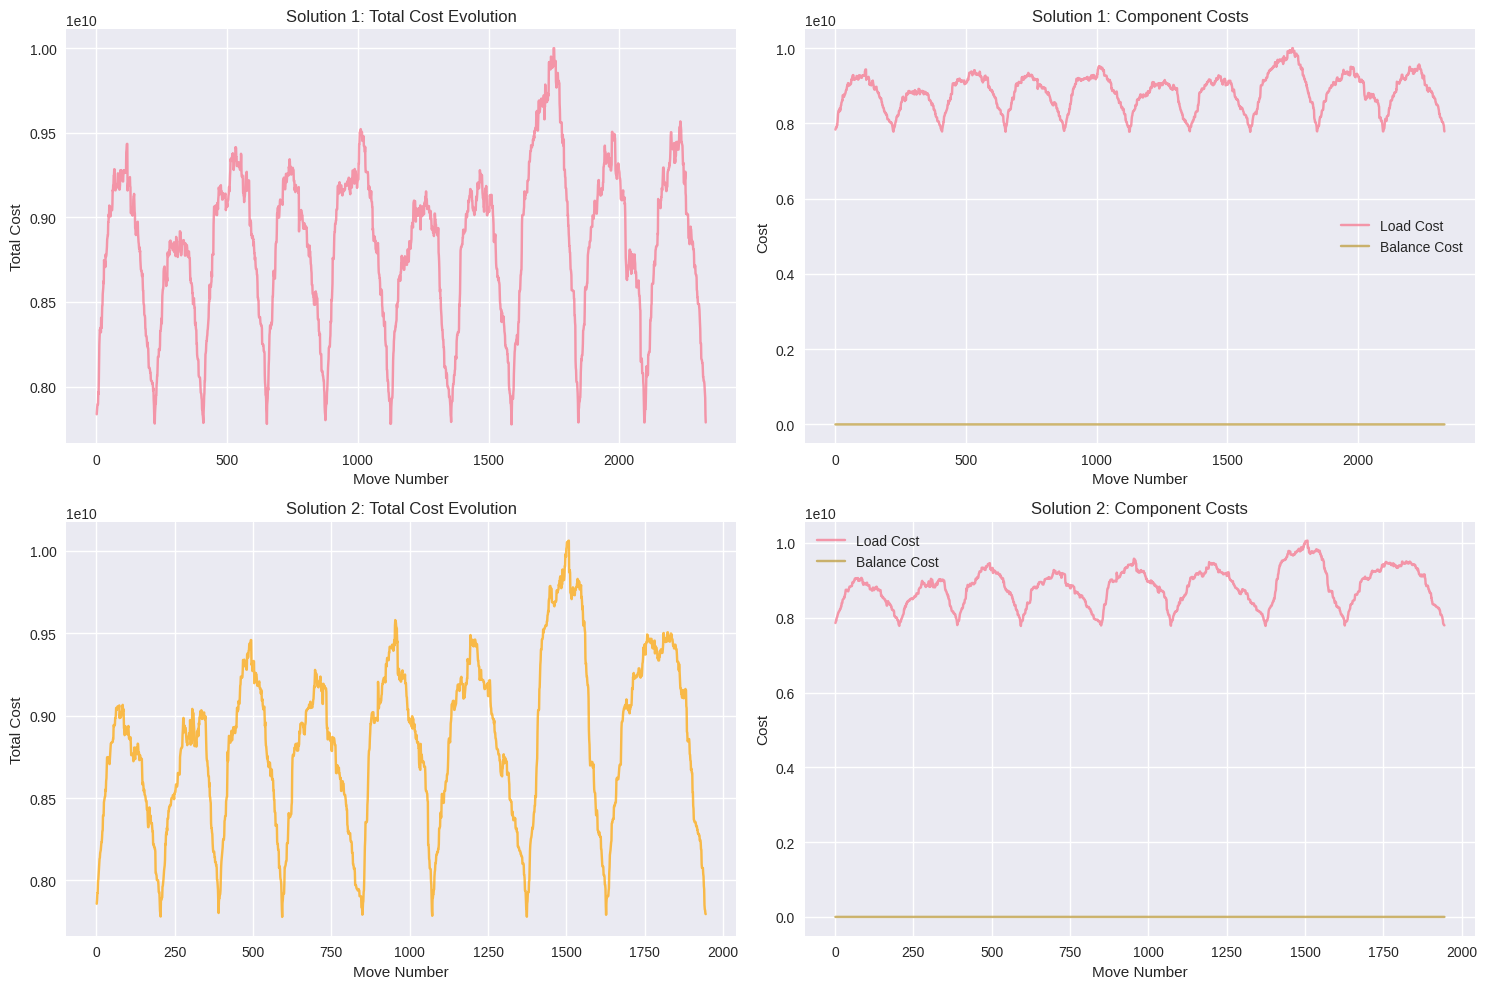

In [6]:
# Plot cost evolution over time
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Solution 1 costs
axes[0, 0].plot(sol1_data['MoveNum'], sol1_data['SolutionCost'], alpha=0.7)
axes[0, 0].set_title('Solution 1: Total Cost Evolution')
axes[0, 0].set_xlabel('Move Number')
axes[0, 0].set_ylabel('Total Cost')

axes[0, 1].plot(sol1_data['MoveNum'], sol1_data['LoadCost'], alpha=0.7, label='Load Cost')
axes[0, 1].plot(sol1_data['MoveNum'], sol1_data['BalanceCost'], alpha=0.7, label='Balance Cost')
axes[0, 1].set_title('Solution 1: Component Costs')
axes[0, 1].set_xlabel('Move Number')
axes[0, 1].set_ylabel('Cost')
axes[0, 1].legend()

# Solution 2 costs
axes[1, 0].plot(sol2_data['MoveNum'], sol2_data['SolutionCost'], alpha=0.7, color='orange')
axes[1, 0].set_title('Solution 2: Total Cost Evolution')
axes[1, 0].set_xlabel('Move Number')
axes[1, 0].set_ylabel('Total Cost')

axes[1, 1].plot(sol2_data['MoveNum'], sol2_data['LoadCost'], alpha=0.7, label='Load Cost')
axes[1, 1].plot(sol2_data['MoveNum'], sol2_data['BalanceCost'], alpha=0.7, label='Balance Cost')
axes[1, 1].set_title('Solution 2: Component Costs')
axes[1, 1].set_xlabel('Move Number')
axes[1, 1].set_ylabel('Cost')
axes[1, 1].legend()

plt.tight_layout()
plt.show()


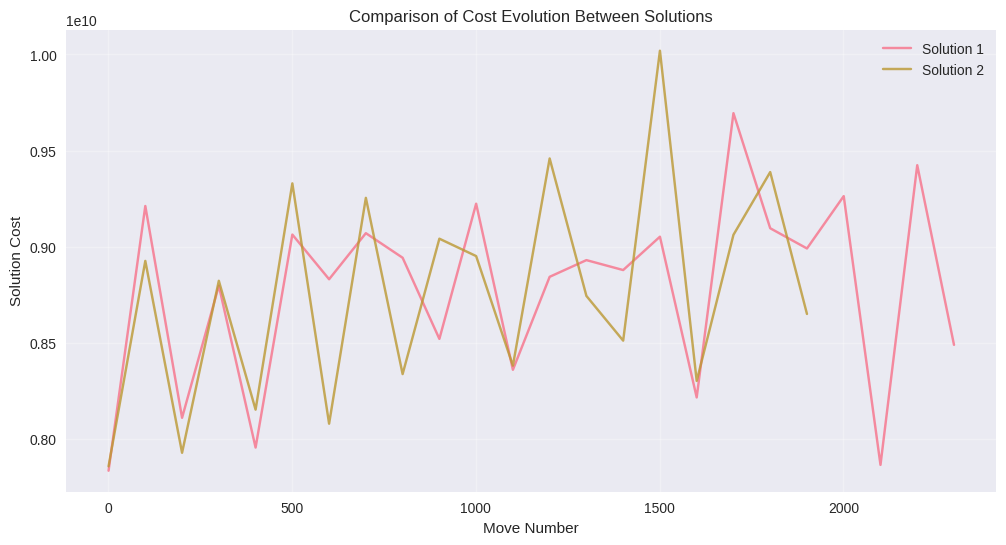

Final costs:
Solution 1: 7787937580
Solution 2: 7796097840
Better solution: Solution 1


In [7]:
# Compare the two solutions
plt.figure(figsize=(12, 6))

# Resample data for better visualization (every 100th point)
sol1_sample = sol1_data[::100] if len(sol1_data) > 1000 else sol1_data
sol2_sample = sol2_data[::100] if len(sol2_data) > 1000 else sol2_data

plt.plot(sol1_sample['MoveNum'], sol1_sample['SolutionCost'], label='Solution 1', alpha=0.8)
plt.plot(sol2_sample['MoveNum'], sol2_sample['SolutionCost'], label='Solution 2', alpha=0.8)
plt.title('Comparison of Cost Evolution Between Solutions')
plt.xlabel('Move Number')
plt.ylabel('Solution Cost')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Final costs:")
print(f"Solution 1: {sol1_data['SolutionCost'].iloc[-1]}")
print(f"Solution 2: {sol2_data['SolutionCost'].iloc[-1]}")
print(f"Better solution: {'Solution 1' if sol1_data['SolutionCost'].iloc[-1] < sol2_data['SolutionCost'].iloc[-1] else 'Solution 2'}")


In [8]:
# Analyze process mobility patterns
def analyze_process_mobility(data, name):
    print(f"\n=== {name} Process Mobility ===")
    
    # Count how many times each process was moved
    process_moves = data['ProcessID'].value_counts()
    
    print(f"Most frequently moved processes:")
    print(process_moves.head(10))
    
    print(f"\nMovement distribution:")
    print(f"Processes moved once: {sum(process_moves == 1)}")
    print(f"Processes moved 2-5 times: {sum((process_moves >= 2) & (process_moves <= 5))}")
    print(f"Processes moved >5 times: {sum(process_moves > 5)}")
    print(f"Max moves for single process: {process_moves.max()}")
    
    return process_moves

sol1_mobility = analyze_process_mobility(sol1_data, "Solution 1")
sol2_mobility = analyze_process_mobility(sol2_data, "Solution 2")



=== Solution 1 Process Mobility ===
Most frequently moved processes:
ProcessID
61     10
142    10
211    10
889    10
851    10
791    10
891    10
137    10
789    10
733    10
Name: count, dtype: int64

Movement distribution:
Processes moved once: 87
Processes moved 2-5 times: 219
Processes moved >5 times: 202
Max moves for single process: 10

=== Solution 2 Process Mobility ===
Most frequently moved processes:
ProcessID
126    8
233    8
176    8
871    8
889    8
142    8
926    8
922    8
211    8
971    8
Name: count, dtype: int64

Movement distribution:
Processes moved once: 105
Processes moved 2-5 times: 285
Processes moved >5 times: 129
Max moves for single process: 8


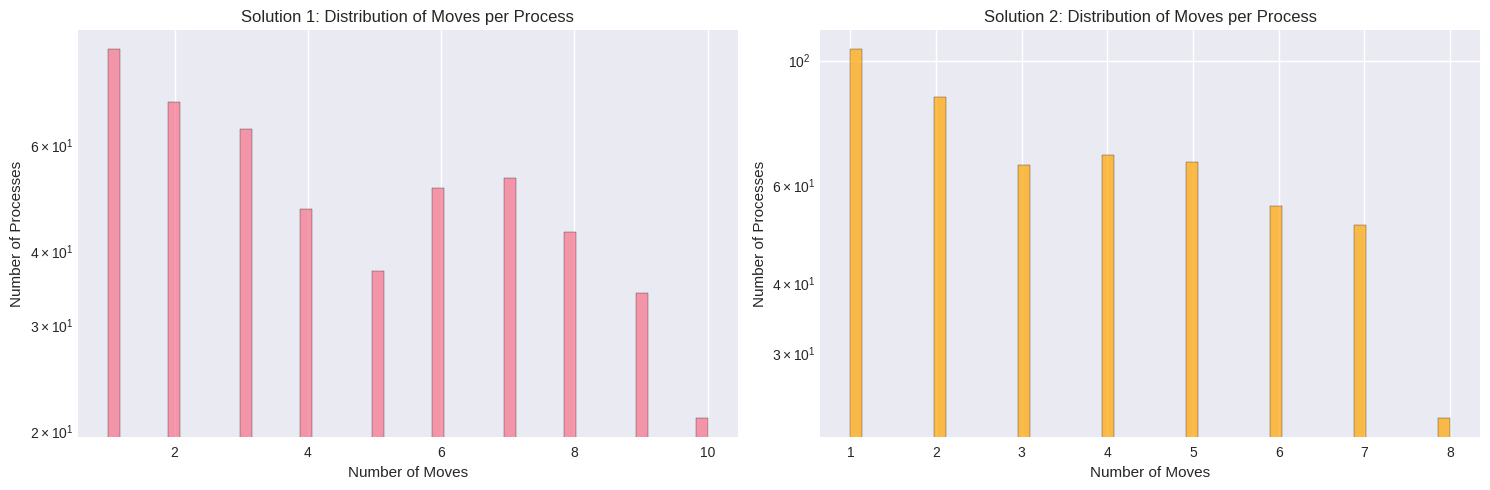

In [9]:
# Visualize process mobility distributions
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Solution 1
axes[0].hist(sol1_mobility.values, bins=50, alpha=0.7, edgecolor='black')
axes[0].set_title('Solution 1: Distribution of Moves per Process')
axes[0].set_xlabel('Number of Moves')
axes[0].set_ylabel('Number of Processes')
axes[0].set_yscale('log')

# Solution 2
axes[1].hist(sol2_mobility.values, bins=50, alpha=0.7, edgecolor='black', color='orange')
axes[1].set_title('Solution 2: Distribution of Moves per Process')
axes[1].set_xlabel('Number of Moves')
axes[1].set_ylabel('Number of Processes')
axes[1].set_yscale('log')

plt.tight_layout()
plt.show()


In [10]:
# Analyze machine utilization patterns
def analyze_machine_patterns(data, name):
    print(f"\n=== {name} Machine Patterns ===")
    
    source_counts = data['SourceMachine'].value_counts()
    dest_counts = data['DestMachine'].value_counts()
    
    print(f"Most active source machines (most processes moved from):")
    print(source_counts.head(10))
    
    print(f"\nMost active destination machines (most processes moved to):")
    print(dest_counts.head(10))
    
    return source_counts, dest_counts

sol1_sources, sol1_dests = analyze_machine_patterns(sol1_data, "Solution 1")
sol2_sources, sol2_dests = analyze_machine_patterns(sol2_data, "Solution 2")



=== Solution 1 Machine Patterns ===
Most active source machines (most processes moved from):
SourceMachine
14    106
76     80
46     76
72     68
83     67
23     65
9      61
10     60
71     60
6      59
Name: count, dtype: int64

Most active destination machines (most processes moved to):
DestMachine
76    89
46    76
23    74
9     72
16    72
60    66
14    64
83    62
10    61
72    58
Name: count, dtype: int64

=== Solution 2 Machine Patterns ===
Most active source machines (most processes moved from):
SourceMachine
72    119
76     71
9      62
14     61
10     59
26     58
23     57
83     54
60     53
36     53
Name: count, dtype: int64

Most active destination machines (most processes moved to):
DestMachine
76    84
36    76
10    74
9     67
16    59
46    59
71    57
23    56
6     52
26    51
Name: count, dtype: int64


In [11]:
# Create a summary report
print("\n" + "="*50)
print("SUMMARY REPORT: S41 Algorithm Analysis")
print("="*50)

print(f"\nDataset: A1_2 (based on file paths)")
print(f"Algorithm: S41 Team Solution (C++)")
print(f"Run time: ~10 seconds")

print(f"\nSolution 1 Results:")
print(f"  - Total moves: {len(sol1_data):,}")
print(f"  - Unique processes moved: {sol1_data['ProcessID'].nunique():,}")
print(f"  - Final cost: {sol1_data['SolutionCost'].iloc[-1]:,}")
print(f"  - Cost reduction: {sol1_data['SolutionCost'].iloc[0] - sol1_data['SolutionCost'].iloc[-1]:,}")

print(f"\nSolution 2 Results:")
print(f"  - Total moves: {len(sol2_data):,}")
print(f"  - Unique processes moved: {sol2_data['ProcessID'].nunique():,}")
print(f"  - Final cost: {sol2_data['SolutionCost'].iloc[-1]:,}")
print(f"  - Cost reduction: {sol2_data['SolutionCost'].iloc[0] - sol2_data['SolutionCost'].iloc[-1]:,}")

better_sol = "Solution 1" if sol1_data['SolutionCost'].iloc[-1] < sol2_data['SolutionCost'].iloc[-1] else "Solution 2"
print(f"\nBetter performing solution: {better_sol}")

print(f"\nAlgorithm characteristics:")
print(f"  - Uses dual solution approach (two parallel searches)")
print(f"  - High activity: generated {len(sol1_data) + len(sol2_data):,} total moves")
print(f"  - Significant cost improvements achieved")
print(f"  - Both solutions converged to similar cost ranges")



SUMMARY REPORT: S41 Algorithm Analysis

Dataset: A1_2 (based on file paths)
Algorithm: S41 Team Solution (C++)
Run time: ~10 seconds

Solution 1 Results:
  - Total moves: 2,331
  - Unique processes moved: 508
  - Final cost: 7,787,937,580
  - Cost reduction: 48,150,680

Solution 2 Results:
  - Total moves: 1,945
  - Unique processes moved: 519
  - Final cost: 7,796,097,840
  - Cost reduction: 62,765,070

Better performing solution: Solution 1

Algorithm characteristics:
  - Uses dual solution approach (two parallel searches)
  - High activity: generated 4,276 total moves
  - Significant cost improvements achieved
  - Both solutions converged to similar cost ranges
